<h2><span style="color:#8e44ad"><span style="font-family:Georgia,serif">Customer Segmentation via K-Means & Hierarchical Clustering & DBSCAN </span></span></h2>

Customer segmentation is the process of dividing a customer base into smaller groups based on common characteristics or behaviors. This is often done as a way to better understand and target specific segments of a customer base, in order to tailor marketing efforts or product offerings to their specific needs and preferences.

Unsupervised learning is a type of machine learning that involves training a model to find patterns or relationships in data without the use of labeled examples or prior knowledge. It is often used for tasks such as clustering, where the goal is to group data points into clusters based on their similarity to one another. There are several unsupervised learning algorithms that can be used for customer segmentation, including:

1. K-means clustering: This algorithm divides the data into a specified number of clusters based on the distance between the data points and their respective cluster centroids.

2. Hierarchical clustering: This algorithm creates a hierarchy of clusters by repeatedly merging or splitting the data based on their similarity.

3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise): This algorithm divides the data into clusters based on the density of the points and the distance between them.

<h2><span style="font-family:Georgia,serif">&nbsp;<span style="color:#8e44ad">Business Problem: Segmentation of a Customer Portfolio</span></span></h2>

FLO wants to segment its customers and determine marketing strategies according to these segments.
To this end, the behaviors of the customers will be defined and groups will be formed according to the clusters in these behaviors.

<h2><span style="color:#8e44ad"><span style="font-family:Georgia,serif">Dataset Story: Purchasing Behavior of FLO Customers</span></span></h2>

The dataset includes Flo's last purchases from OmniChannel (both online and offline shoppers) in 2020 - 2021. 12 Variables 19,945 Observations 2.7MB

* master_id: Unique client number
* order_channel: Which channel of the shopping platform is used (Android, ios, Desktop, Mobile)
* last_order_channel: The channel where the last purchase was made
* first_order_date: The date of the first purchase made by the customer
* last_order_date: The date of the customer's last purchase
* last_order_date_online: The date of the last purchase made by the customer on the online platform
* last_order_date_offline: The date of the last purchase made by the customer on the offline platform
* order_num_total_ever_online: The total number of purchases made by the customer on the online platform
* order_num_total_ever_offline: Total number of purchases made by the customer offline
* customer_value_total_ever_offline: The total price paid by the customer for offline purchases
* customer_value_total_ever_online: The total price paid by the customer for their online shopping
* interested_in_categories_12: List of categories the customer has purchased from in the last 12 months

# 1. Loading required libraries and data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans      # K-Means
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer     # Elbow method
from scipy.cluster.hierarchy import linkage, dendrogram  # hierarchical clustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering     # hierarchical clustering

# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', 500)
# import warnings
# warnings.simplefilter(action='ignore', category=Warning)

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('/content/flo_data_20k.csv')

df['tenure'] = (pd.to_datetime('today') - pd.to_datetime(df['first_order_date'])).dt.days
df['recency'] = (pd.to_datetime('today') - pd.to_datetime(df['last_order_date'])).dt.days
df['frequency'] = df['order_num_total_ever_online'] + df['order_num_total_ever_offline']
df['monetary'] = df['customer_value_total_ever_online'] + df['customer_value_total_ever_offline']

df["order_num_total"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]
df["customer_value_total"] = df["customer_value_total_ever_offline"] + df["customer_value_total_ever_online"]

In [ ]:
df

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,tenure,recency,frequency,monetary,order_num_total,customer_value_total
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],1383,1264,5.0,939.37,5.0,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",2743,1274,21.0,2013.55,21.0,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",1721,1355,5.0,585.32,5.0,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",1315,1304,2.0,121.97,2.0,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],1837,1255,2.0,209.98,2.0,209.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19940,727e2b6e-ddd4-11e9-a848-000d3a38a36f,Android App,Offline,2019-09-21,2020-07-05,2020-06-05,2020-07-05,1.0,2.0,289.98,111.98,"[ERKEK, AKTIFSPOR]",1788,1500,3.0,401.96,3.0,401.96
19941,25cd53d4-61bf-11ea-8dd8-000d3a38a36f,Desktop,Desktop,2020-03-01,2020-12-22,2020-12-22,2020-03-01,1.0,1.0,150.48,239.99,[AKTIFSPOR],1626,1330,2.0,390.47,2.0,390.47
19942,8aea4c2a-d6fc-11e9-93bc-000d3a38a36f,Ios App,Ios App,2019-09-11,2021-05-24,2021-05-24,2019-09-11,2.0,1.0,139.98,492.96,[AKTIFSPOR],1798,1177,3.0,632.94,3.0,632.94
19943,e50bb46c-ff30-11e9-a5e8-000d3a38a36f,Android App,Android App,2019-03-27,2021-02-13,2021-02-13,2021-01-08,1.0,5.0,711.79,297.98,"[ERKEK, AKTIFSPOR]",1966,1277,6.0,1009.77,6.0,1009.77


# 2. Exploratory Data Analysis

In [ ]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    numeric_df = dataframe.select_dtypes(include=['number'])
    print(numeric_df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(19945, 18)
##################### Types #####################
master_id                             object
order_channel                         object
last_order_channel                    object
first_order_date                      object
last_order_date                       object
last_order_date_online                object
last_order_date_offline               object
order_num_total_ever_online          float64
order_num_total_ever_offline         float64
customer_value_total_ever_offline    float64
customer_value_total_ever_online     float64
interested_in_categories_12           object
tenure                                 int64
recency                                int64
frequency                            float64
monetary                             float64
order_num_total                      float64
customer_value_total                 float64
dtype: object
##################### Head #####################
               

In [ ]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

In [ ]:
def correlation_matrix(df, cols):
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(df[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w', cmap='RdBu')
    plt.show(block=True)

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # print(f"Observations: {dataframe.shape[0]}")
    # print(f"Variables: {dataframe.shape[1]}")
    # print(f'cat_cols: {len(cat_cols)}')
    # print(f'num_cols: {len(num_cols)}')
    # print(f'cat_but_car: {len(cat_but_car)}')
    # print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

    cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=5, car_th=20)
    print(cat_cols)
    print(num_cols)
    print(cat_but_car)

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

In [ ]:
cat_cols

['order_channel', 'last_order_channel']

In [ ]:
num_cols

['order_num_total_ever_online',
 'order_num_total_ever_offline',
 'customer_value_total_ever_offline',
 'customer_value_total_ever_online',
 'tenure',
 'recency',
 'frequency',
 'monetary',
 'order_num_total',
 'customer_value_total']

count    19945.000000
mean         3.110855
std          4.225647
min          1.000000
5%           1.000000
10%          1.000000
20%          1.000000
30%          1.000000
40%          1.000000
50%          2.000000
60%          2.000000
70%          3.000000
80%          4.000000
90%          7.000000
95%         10.000000
99%         20.000000
max        200.000000
Name: order_num_total_ever_online, dtype: float64


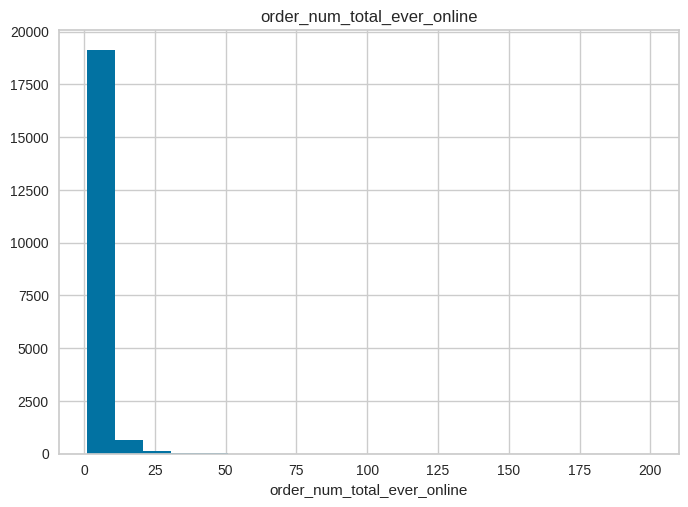

count    19945.000000
mean         1.913913
std          2.062880
min          1.000000
5%           1.000000
10%          1.000000
20%          1.000000
30%          1.000000
40%          1.000000
50%          1.000000
60%          2.000000
70%          2.000000
80%          3.000000
90%          4.000000
95%          4.000000
99%          7.000000
max        109.000000
Name: order_num_total_ever_offline, dtype: float64


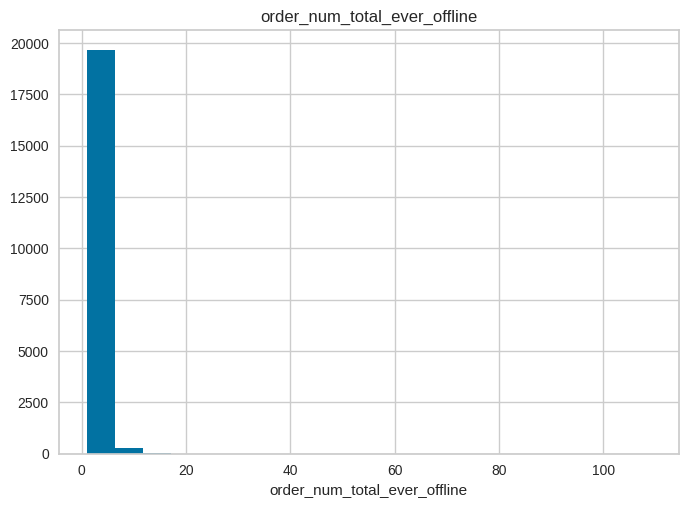

count    19945.000000
mean       253.922597
std        301.532853
min         10.000000
5%          39.990000
10%         59.990000
20%         89.980000
30%        110.480000
40%        140.230000
50%        179.980000
60%        220.860000
70%        281.868000
80%        365.058000
90%        519.950000
95%        694.222000
99%       1219.946800
max      18119.140000
Name: customer_value_total_ever_offline, dtype: float64


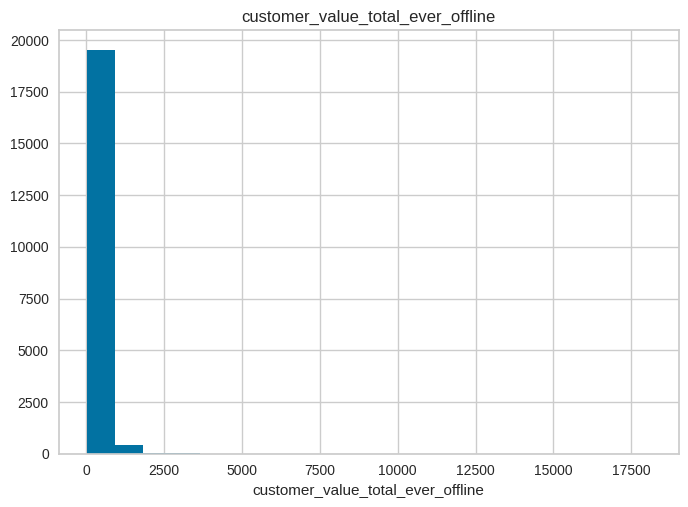

count    19945.000000
mean       497.321690
std        832.601886
min         12.990000
5%          63.990000
10%         84.990000
20%        125.990000
30%        173.970000
40%        219.990000
50%        286.460000
60%        371.944000
70%        491.526000
80%        690.868000
90%       1082.036000
95%       1556.726000
99%       3143.810400
max      45220.130000
Name: customer_value_total_ever_online, dtype: float64


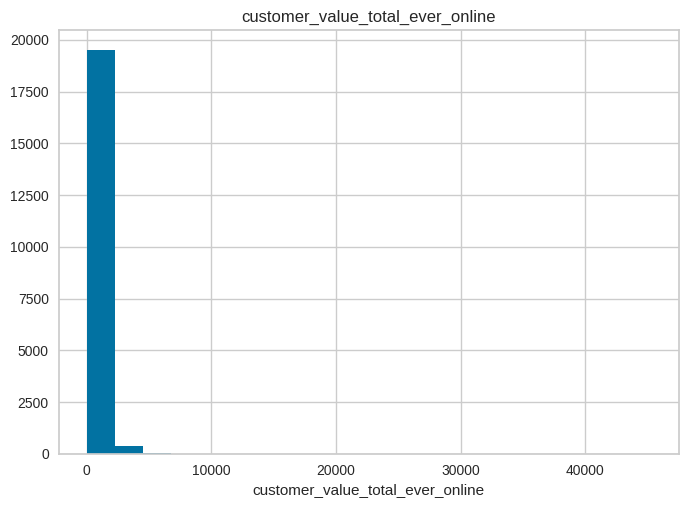

count    19945.000000
mean      1970.302833
std        523.396883
min       1174.000000
5%        1378.200000
10%       1507.000000
20%       1647.000000
30%       1718.000000
40%       1769.000000
50%       1820.000000
60%       1899.000000
70%       1983.000000
80%       2136.200000
90%       2713.000000
95%       3243.000000
99%       3774.000000
max       4229.000000
Name: tenure, dtype: float64


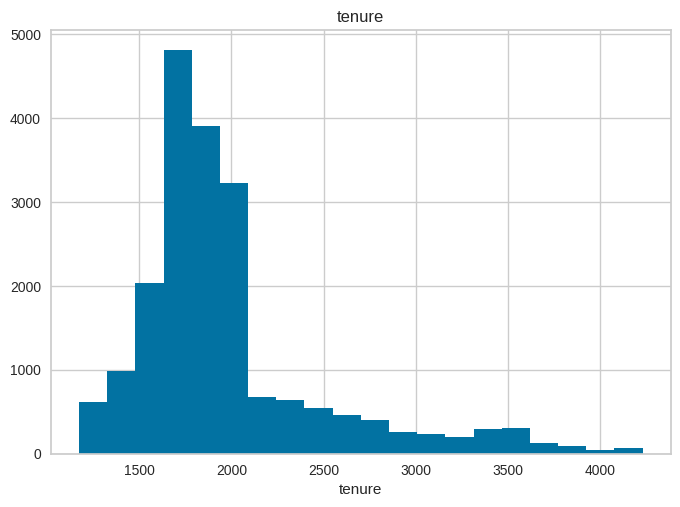

count    19945.000000
mean      1303.458360
std        103.281149
min       1171.000000
5%        1178.000000
10%       1185.000000
20%       1202.000000
30%       1225.000000
40%       1252.000000
50%       1280.000000
60%       1314.000000
70%       1355.000000
80%       1401.000000
90%       1477.000000
95%       1504.000000
99%       1529.000000
max       1536.000000
Name: recency, dtype: float64


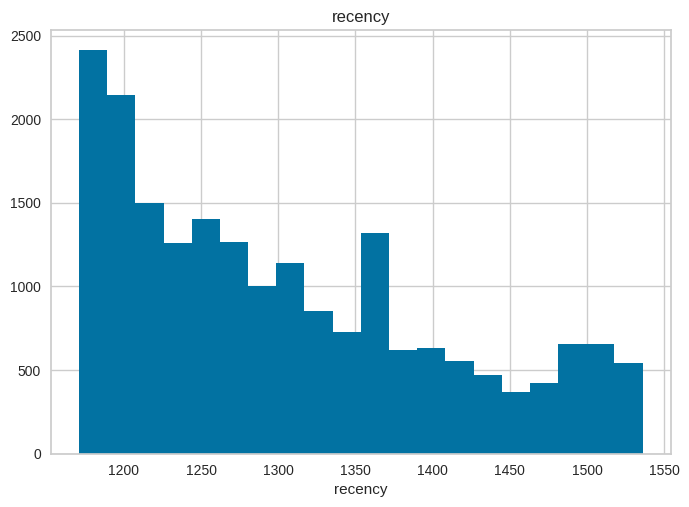

count    19945.000000
mean         5.024768
std          4.742707
min          2.000000
5%           2.000000
10%          2.000000
20%          2.000000
30%          3.000000
40%          3.000000
50%          4.000000
60%          4.000000
70%          5.000000
80%          7.000000
90%          9.000000
95%         12.000000
99%         22.000000
max        202.000000
Name: frequency, dtype: float64


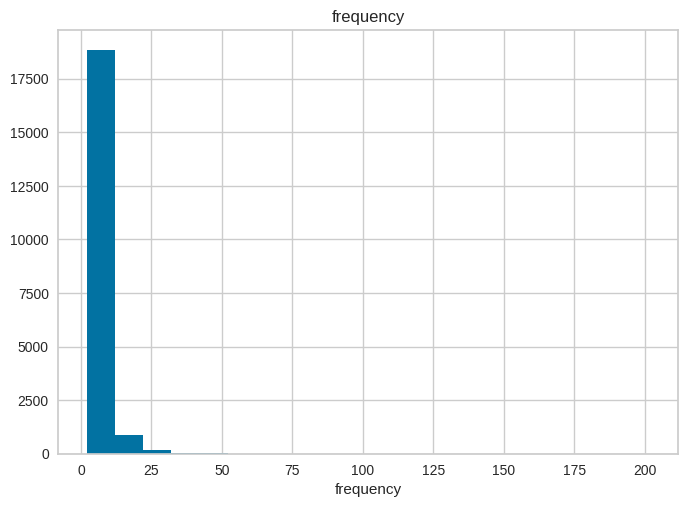

count    19945.000000
mean       751.244287
std        895.402173
min         44.980000
5%         175.480000
10%        224.970000
20%        302.188000
30%        378.888000
40%        455.826000
50%        545.270000
60%        660.380000
70%        803.706000
80%       1020.036000
90%       1429.938000
95%       1921.924000
99%       3606.355600
max      45905.100000
Name: monetary, dtype: float64


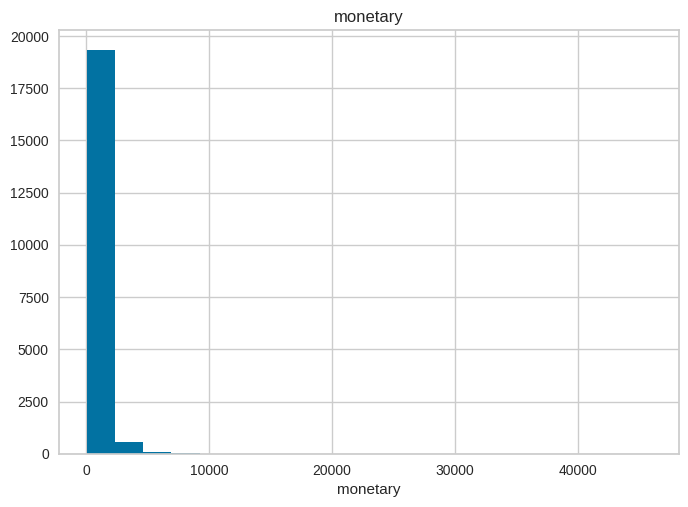

count    19945.000000
mean         5.024768
std          4.742707
min          2.000000
5%           2.000000
10%          2.000000
20%          2.000000
30%          3.000000
40%          3.000000
50%          4.000000
60%          4.000000
70%          5.000000
80%          7.000000
90%          9.000000
95%         12.000000
99%         22.000000
max        202.000000
Name: order_num_total, dtype: float64


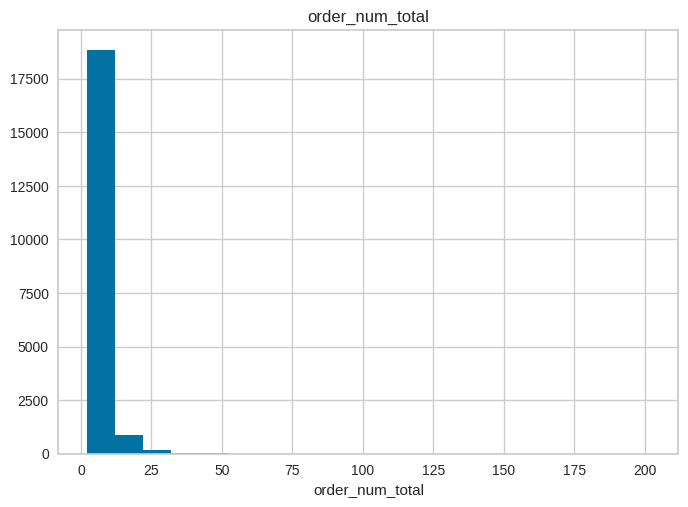

count    19945.000000
mean       751.244287
std        895.402173
min         44.980000
5%         175.480000
10%        224.970000
20%        302.188000
30%        378.888000
40%        455.826000
50%        545.270000
60%        660.380000
70%        803.706000
80%       1020.036000
90%       1429.938000
95%       1921.924000
99%       3606.355600
max      45905.100000
Name: customer_value_total, dtype: float64


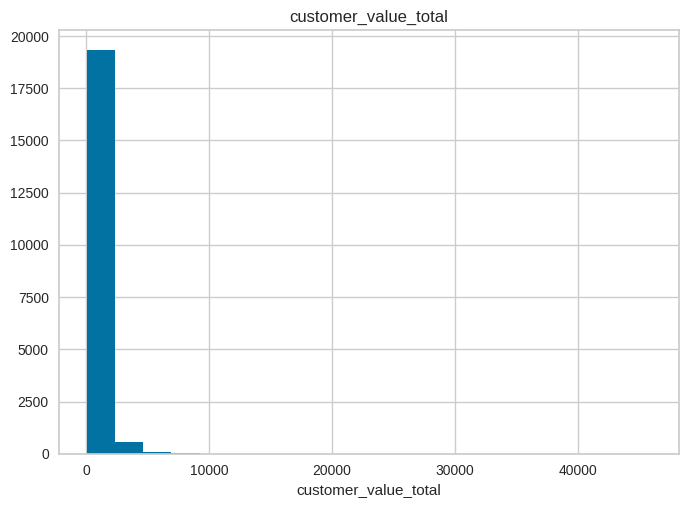

In [ ]:
# Examination of numerical variables
df[num_cols].describe().T

for col in num_cols:
     num_summary(df, col, plot=True)

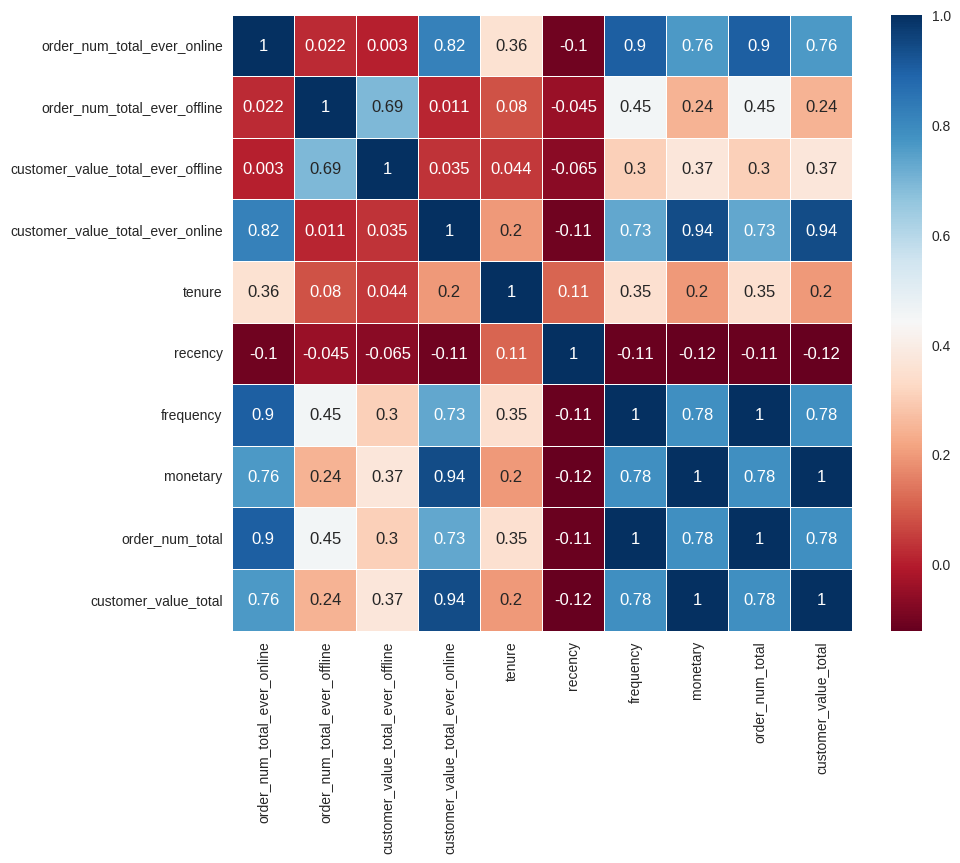

In [ ]:
# Correlation of numerical variables with each other
correlation_matrix(df, num_cols)

# 3. Data Preprocessing & Feature Engineering

In [ ]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

def check_outlier(dataframe, col_name, q1=0.25, q3=0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]
for col in binary_cols:
    df = label_encoder(df, col)

def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

ohe_cols = [col for col in df.columns if
            25 >= df[col].nunique() > 2]

df = one_hot_encoder(df, ohe_cols)
cat_cols, num_cols, cat_but_car = grab_col_names(df)

In [ ]:
cat_cols

['order_channel_Desktop',
 'order_channel_Ios App',
 'order_channel_Mobile',
 'last_order_channel_Desktop',
 'last_order_channel_Ios App',
 'last_order_channel_Mobile',
 'last_order_channel_Offline']

In [ ]:
num_cols

['order_num_total_ever_online',
 'order_num_total_ever_offline',
 'customer_value_total_ever_offline',
 'customer_value_total_ever_online',
 'tenure',
 'recency',
 'frequency',
 'monetary',
 'order_num_total',
 'customer_value_total']

In [ ]:
df.head()

,master_id,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,...,monetary,order_num_total,customer_value_total,order_channel_Desktop,order_channel_Ios App,order_channel_Mobile,last_order_channel_Desktop,last_order_channel_Ios App,last_order_channel_Mobile,last_order_channel_Offline
0,cc294636-19f0-11eb-8d74-000d3a38a36f,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],...,939.37,5.0,939.37,False,False,False,False,False,False,True
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",...,2013.55,21.0,2013.55,False,False,False,False,False,True,False
2,69b69676-1a40-11ea-941b-000d3a38a36f,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",...,585.32,5.0,585.32,False,False,False,False,False,False,False
3,1854e56c-491f-11eb-806e-000d3a38a36f,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",...,121.97,2.0,121.97,False,False,False,False,False,False,False
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],...,209.98,2.0,209.98,True,False,False,True,False,False,False


In [ ]:
df.shape

(19945, 23)

# 4. Customer Segmentation with K-Means

K-Means is a clustering algorithm used to divide a dataset into clusters. This algorithm creates clusters using the coordinates of the points in the dataset. Therefore, the K-Means algorithm can only be applied for numerical variables. The K-Means algorithm determines a center point to divide the dataset into its clusters. These center points are the average of the coordinates of the points in the dataset. The K-Means algorithm assigns each point to the nearest centre.


In [ ]:
sc = StandardScaler()
X = sc.fit_transform(df[num_cols])
X = pd.DataFrame(X, columns=num_cols)
X.head()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,tenure,recency,frequency,monetary,order_num_total,customer_value_total
0,0.210422,-0.443039,-0.377854,0.362797,-1.122127,-0.382058,-0.005222,0.210107,-0.005222,0.210107
1,3.760263,0.041732,-0.311591,1.628981,1.476349,-0.285232,3.368463,1.409799,3.368463,1.409799
2,-0.026234,0.041732,-0.212097,-0.122477,-0.476329,0.499055,-0.005222,-0.185312,-0.005222,-0.185312
3,-0.499547,-0.443039,-0.709501,-0.498860,-1.252050,0.005244,-0.637788,-0.702802,-0.637788,-0.702802
4,-0.499547,-0.443039,-0.676337,-0.405164,-0.254694,-0.469201,-0.637788,-0.604508,-0.637788,-0.604508


For the K-Means algorithm to work, it is necessary to determine the optimum clusters. The Elbow method can be used for this. For the Elbow method, the WCSS values of the clusters must be calculated. WCSS values decrease with increasing number of clusters. Looking at the graph of these values, the decrease slows down after a point. After this point, increasing the number of clusters will not work. This point is called the Elbow point.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

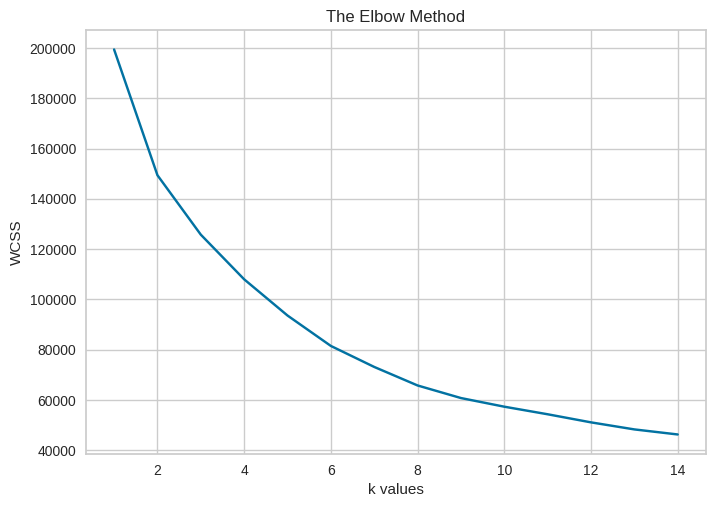

In [ ]:
wcss = []  # We created a list to hold WCSS values.
for k in range(1, 15):  # We looped the numbers from 1 to 15.
    kmeans = KMeans(n_clusters=k).fit(X)  # We ran the K-Means algorithm.
    wcss.append(kmeans.inertia_)  # We added the WCSS values to the wcss list.

plt.plot(range(1, 15), wcss, 'bx-')  # We plotted the WCSS values.
plt.xlabel('k values')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

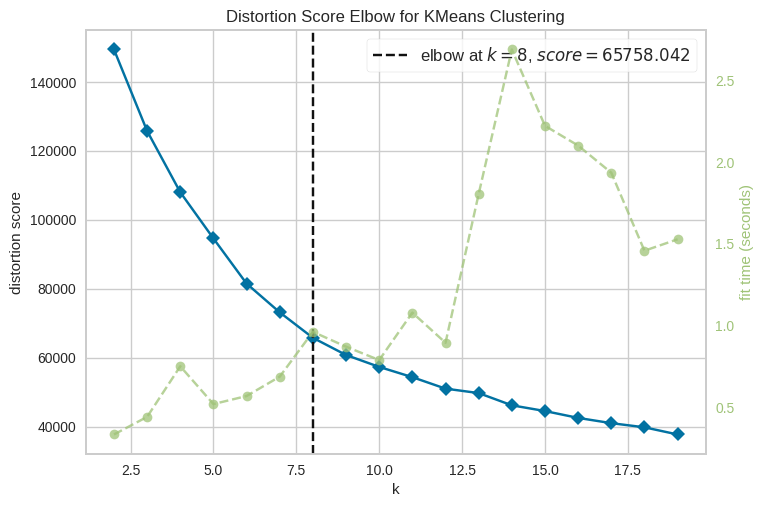

8

In [ ]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(X)
elbow.show(block=True)

elbow.elbow_value_

In [ ]:
kmeans = KMeans(n_clusters=elbow.elbow_value_, init='k-means++').fit(X)
kmeans.cluster_centers_  # Indicates the centers of clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[-0.28151804, -0.18414091, -0.19312738, -0.22562533, -0.44279989,
        -0.63825081, -0.33091998, -0.27483776, -0.33091998, -0.27483776],
       [ 0.06449313, -0.04205883, -0.06119604, -0.12440353,  2.28947782,
         0.2909666 ,  0.03916811, -0.1362865 ,  0.03916811, -0.1362865 ],
       [ 4.1679002 ,  0.29687515,  0.22991251,  3.35815899,  1.45246609,
        -0.40383178,  3.84263517,  3.20005442,  3.84263517,  3.20005442],
       [ 1.2019941 , -0.05686517, -0.09956692,  1.04273575,  0.41075465,
        -0.34292679,  1.04621616,  0.93607217,  1.04621616,  0.93607217],
       [20.32618901, -0.16602674,  0.860791  , 32.33279837,  1.6305654 ,
        -0.8910832 , 18.03796981, 30.3549695 , 18.03796981, 30.3549695 ],
       [-0.14463325,  1.43838363,  1.73222844, -0.09463303, -0.03780019,
        -0.29607795,  0.49677201,  0.49534406,  0.49677201,  0.49534406],
       [ 0.04658278, 25.28712872, 18.67014342,  0.3528747 , -0.03952635,
         0.07078788, 11.04035317,  6.6154248 

In [ ]:
kmeans.n_clusters  # Indicates the number of clusters.

8

In [ ]:
kmeans.labels_

array([0, 2, 7, ..., 0, 5, 7], dtype=int32)

In [ ]:
kmeans.inertia_  # Displays the WCSS value.

65755.41818570039

In [ ]:
kmeans.get_params()  # With get_params() we can see the parameters of the kmeans model.

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 'warn',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [ ]:
X[0:5]

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,tenure,recency,frequency,monetary,order_num_total,customer_value_total
0,0.210422,-0.443039,-0.377854,0.362797,-1.122127,-0.382058,-0.005222,0.210107,-0.005222,0.210107
1,3.760263,0.041732,-0.311591,1.628981,1.476349,-0.285232,3.368463,1.409799,3.368463,1.409799
2,-0.026234,0.041732,-0.212097,-0.122477,-0.476329,0.499055,-0.005222,-0.185312,-0.005222,-0.185312
3,-0.499547,-0.443039,-0.709501,-0.498860,-1.252050,0.005244,-0.637788,-0.702802,-0.637788,-0.702802
4,-0.499547,-0.443039,-0.676337,-0.405164,-0.254694,-0.469201,-0.637788,-0.604508,-0.637788,-0.604508


In [ ]:
clusters_kmeans = kmeans.labels_    # Indicates which observation the clusters belong to.
X["cluster"] = clusters_kmeans   # We added a variable named cluster_no to X.
X.head()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,tenure,recency,frequency,monetary,order_num_total,customer_value_total,cluster
0,0.210422,-0.443039,-0.377854,0.362797,-1.122127,-0.382058,-0.005222,0.210107,-0.005222,0.210107,0
1,3.760263,0.041732,-0.311591,1.628981,1.476349,-0.285232,3.368463,1.409799,3.368463,1.409799,2
2,-0.026234,0.041732,-0.212097,-0.122477,-0.476329,0.499055,-0.005222,-0.185312,-0.005222,-0.185312,7
3,-0.499547,-0.443039,-0.709501,-0.498860,-1.252050,0.005244,-0.637788,-0.702802,-0.637788,-0.702802,0
4,-0.499547,-0.443039,-0.676337,-0.405164,-0.254694,-0.469201,-0.637788,-0.604508,-0.637788,-0.604508,0


In [ ]:
X.groupby('cluster').agg(['mean', 'median', 'count', 'std'])
X.groupby('cluster').agg(['mean', 'median', 'count', 'std']).T

cluster                                             0            1  \
order_num_total_ever_online       mean      -0.280923     0.064493   
                                  median    -0.499547    -0.026234   
                                  count   8688.000000  1672.000000   
                                  std        0.287577     0.521789   
order_num_total_ever_offline      mean      -0.184305    -0.042059   
                                  median    -0.443039    -0.443039   
                                  count   8688.000000  1672.000000   
                                  std        0.370568     0.538123   
customer_value_total_ever_offline mean      -0.193604    -0.061196   
                                  median    -0.311525    -0.212064   
                                  count   8688.000000  1672.000000   
                                  std        0.438550     0.583820   
customer_value_total_ever_online  mean      -0.224937    -0.124404   
                                  median    -0.309077    -0.194986   
                                  count   8688.000000  1672.000000   
                                  std        0.279008     0.346685   
tenure                            mean      -0.442898     2.289478   
                                  median    -0.426652     2.278820   
                                  count   8688.000000  1672.000000   
                                  std        0.473548     0.823050   
recency                           mean      -0.638897     0.290967   
                                  median    -0.701582     0.179530   
                                  count   8688.000000  1672.000000   
                                  std        0.450514     0.992819   
frequency                         mean      -0.330461     0.039168   
                                  median    -0.426933    -0.005222   
                                  count   8688.000000  1672.000000   
                                  std        0.287217     0.492704   
monetary                          mean      -0.274359    -0.136286   
                                  median    -0.329977    -0.169274   
                                  count   8688.000000  1672.000000   
                                  std        0.290742     0.342192   
order_num_total                   mean      -0.330461     0.039168   
                                  median    -0.426933    -0.005222   
                                  count   8688.000000  1672.000000   
                                  std        0.287217     0.492704   
customer_value_total              mean      -0.274359    -0.136286   
                                  median    -0.329977    -0.169274   
                                  count   8688.000000  1672.000000   
                                  std        0.290742     0.342192   

cluster                                            2            3          4  \
order_num_total_ever_online       mean      4.168878     1.205748  20.326189   
                                  median    3.760263     1.157046  15.593067   
                                  count   417.000000  2002.000000   7.000000   
                                  std       1.991831     0.677577  14.238753   
order_num_total_ever_offline      mean      0.297487    -0.055125  -0.166027   
                                  median    0.041732    -0.443039  -0.443039   
                                  count   417.000000  2002.000000   7.000000   
                                  std       1.058119     0.494733   0.549679   
customer_value_total_ever_offline mean      0.231012    -0.098232   0.860791   
                                  median   -0.176379    -0.244383   0.945252   
                                  count   417.000000  2002.000000   7.000000   
                                  std       1.234738     0.563742   1.513316   
customer_value_total_ever_online  mean      3.363933     1.044028  32.332798   
         

In [ ]:
X['cluster'] = X['cluster'] + 1
X.head()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,tenure,recency,frequency,monetary,order_num_total,customer_value_total,cluster
0,0.210422,-0.443039,-0.377854,0.362797,-1.122127,-0.382058,-0.005222,0.210107,-0.005222,0.210107,1
1,3.760263,0.041732,-0.311591,1.628981,1.476349,-0.285232,3.368463,1.409799,3.368463,1.409799,3
2,-0.026234,0.041732,-0.212097,-0.122477,-0.476329,0.499055,-0.005222,-0.185312,-0.005222,-0.185312,8
3,-0.499547,-0.443039,-0.709501,-0.498860,-1.252050,0.005244,-0.637788,-0.702802,-0.637788,-0.702802,1
4,-0.499547,-0.443039,-0.676337,-0.405164,-0.254694,-0.469201,-0.637788,-0.604508,-0.637788,-0.604508,1


In [ ]:
X["cluster"].value_counts()                 # It shows the number of observations belonging to each cluster.
X["cluster"].value_counts() / len(X) * 100

,count
cluster,
1,43.559789
8,27.430434
4,10.037603
6,8.398095
2,8.383053
3,2.090750
7,0.065179
5,0.035097


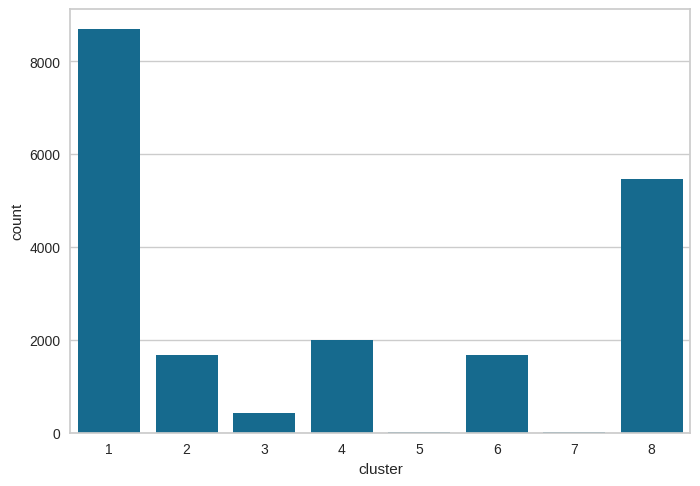

In [ ]:
sns.countplot(x='cluster', data=X)
plt.show()

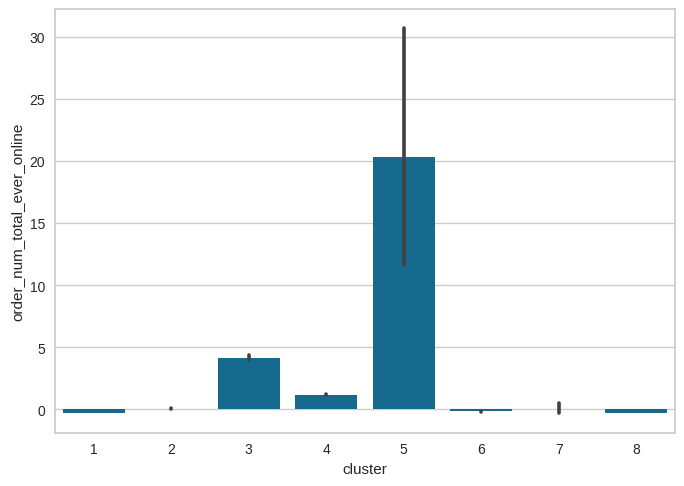

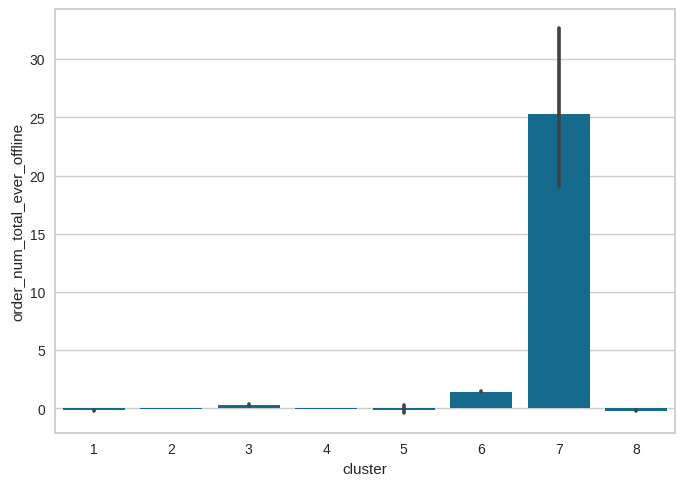

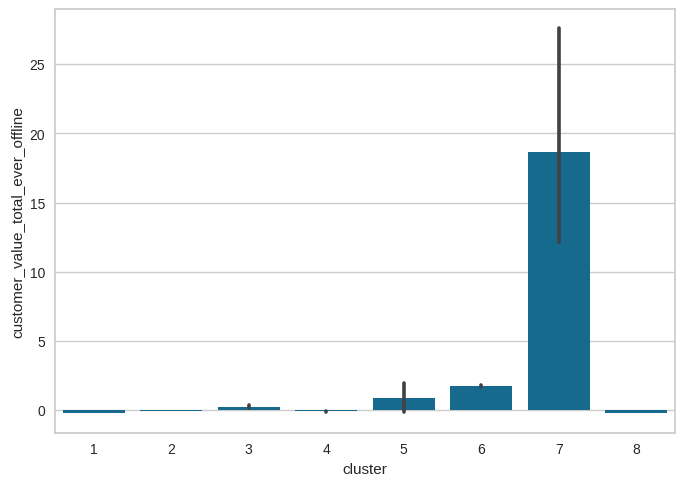

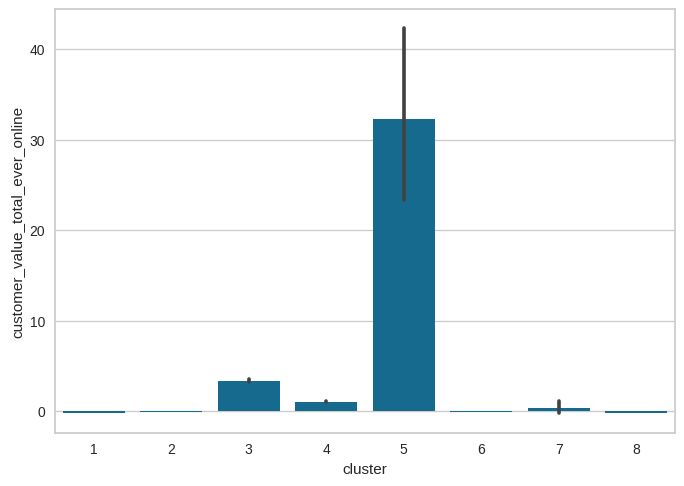

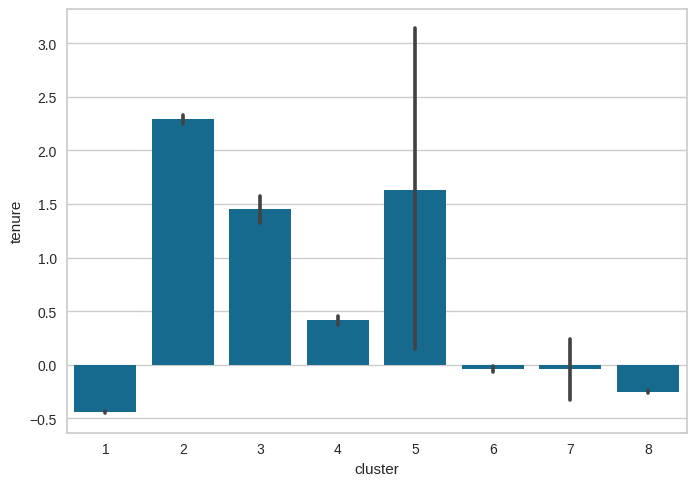

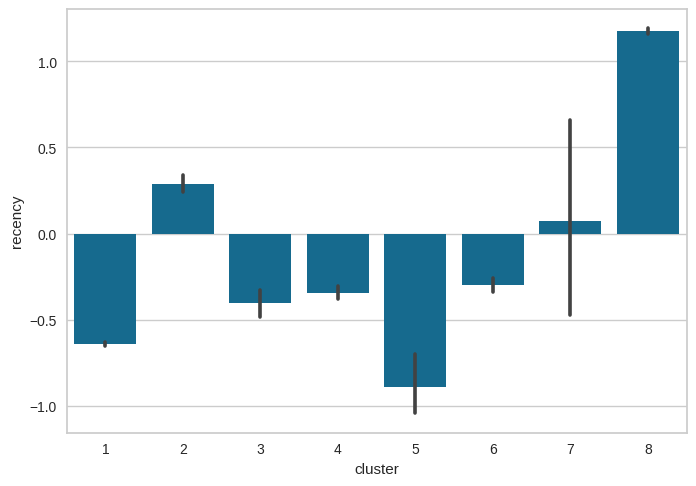

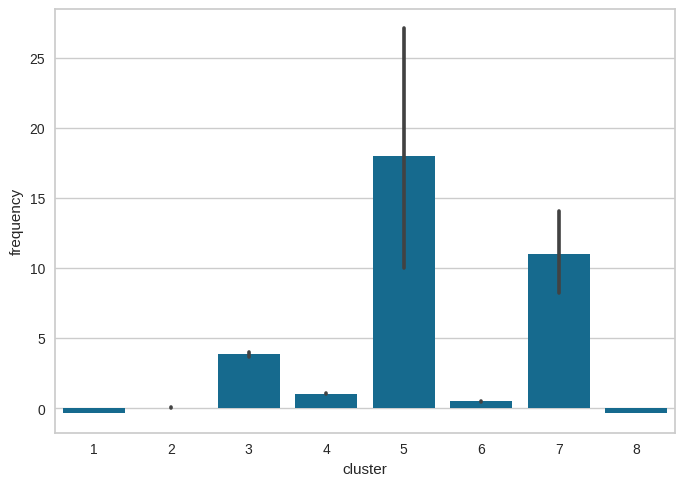

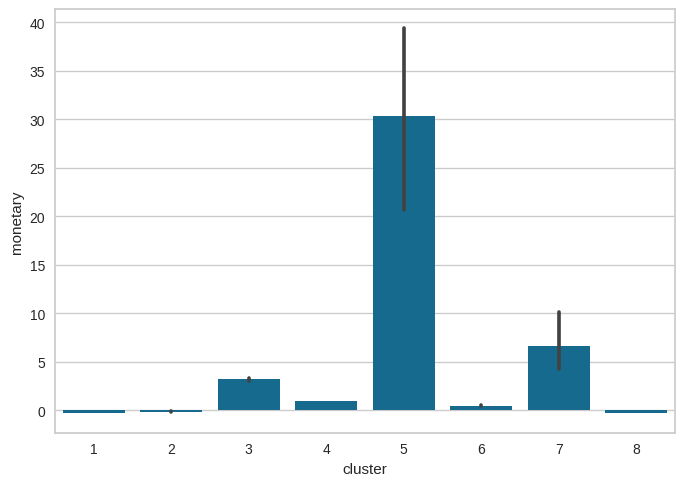

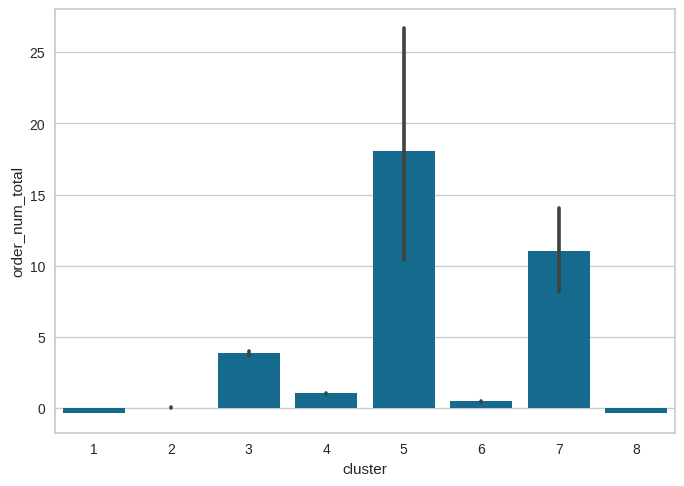

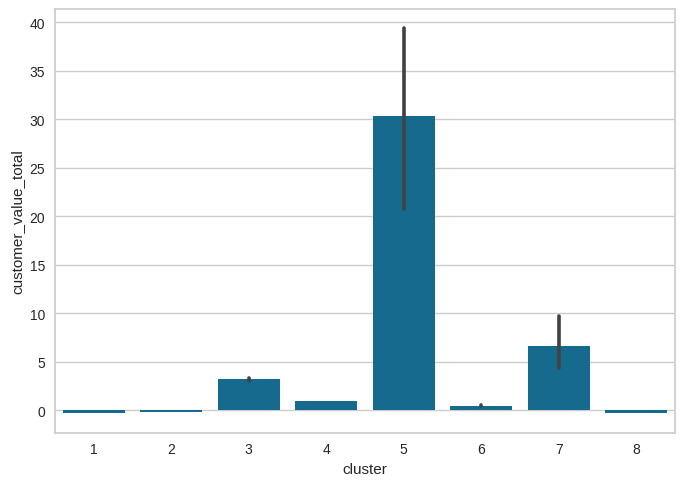

In [ ]:
for i in num_cols:
    sns.barplot(x='cluster', y=i, data=X)
    plt.show()

In [ ]:
# sns.pairplot(X, hue='cluster')
# plt.show()

# 5. Customer Segmentation with Hierarchical Clustering

**The Hierarchical Clustering (HC) method** is a clustering method used to separate data points into groups with similar characteristics. This method is used to group data points about each other. Each of these groups is called a cluster.

The HC method is also called the link matrix method. This method is used to group data points according to their degree of connectivity to each other. This method creates a connectivity matrix to measure the degrees of relationship between data points. This matrix shows the degrees of connectivity between the data points and clusters the data points according to these degrees.

The connectivity matrix method clusters data points according to their degree of similarity and is used to measure the degree of association between data points. This method creates cluster centers according to the similarity degrees of the data points and places the data points in the clusters closest to these cluster centers. The connectivity matrix method is used to best group the data points and this method is used to measure the degrees of relationship between the data points. The differences between these methods are how they place the data points into clusters.


In this snippet, a link matrix is created that measures the degree of similarity of data points using the linkage() function of the scipy library. Then, using this link matrix, a dendogram is created with the HC method using the dendrogram() function of the scipy library. This dendogram is displayed using the show() function of the matplotlib library. In this snippet, the method parameter is specified as 'ward', so the hc_ward method is used as the HC method. This parameter value can take different values such as 'single', 'complete' or 'average' and according to these values, a dendogram can be obtained by applying the HC method with different methods.

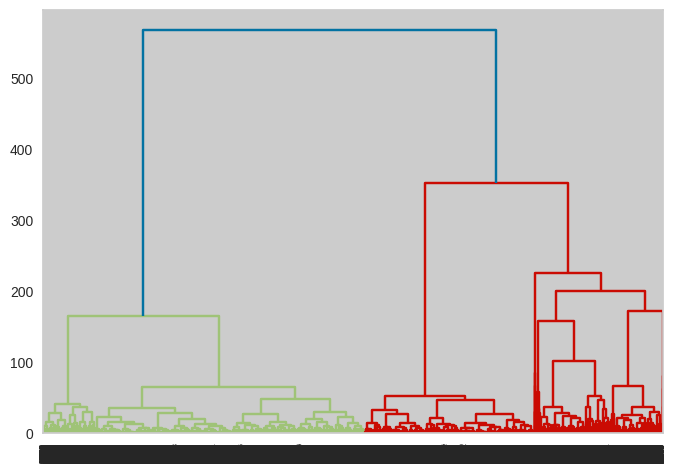

In [ ]:
linkage_matrix = linkage(X, method='ward')

# Create the dendrogram
dend = dendrogram(linkage_matrix)

# Show the dendrogram
plt.show()

In [ ]:
hc_average = linkage(X, "average")  # We created a connection matrix with the average method.
hc_ward = linkage(X, "ward")  # We created a connection matrix with the ward method.
hc_complete = linkage(X, "complete")  # We created a connection matrix with the complete method.
hc_single = linkage(X, "single")  # We created a connection matrix with the single method.
hc_centroid = linkage(X, "centroid")  # We created a connection matrix with the centroid method.

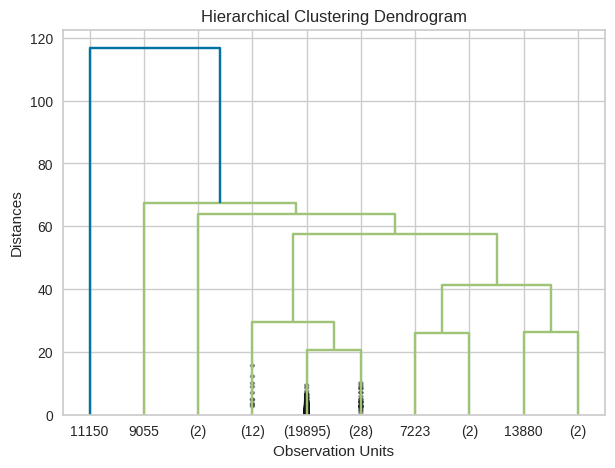

In [ ]:
plt.figure(figsize=(7, 5))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Observation Units")
plt.ylabel("Distances")
dendrogram(hc_average,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
           leaf_font_size=10)
plt.show()

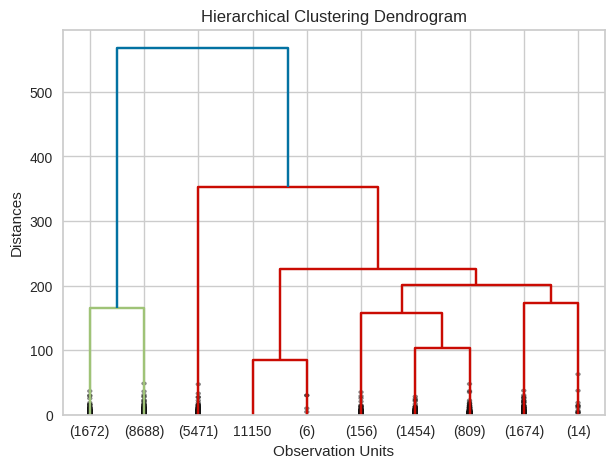

In [ ]:
plt.figure(figsize=(7, 5))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Observation Units")
plt.ylabel("Distances")
dendrogram(hc_ward,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
           leaf_font_size=10)
plt.show()

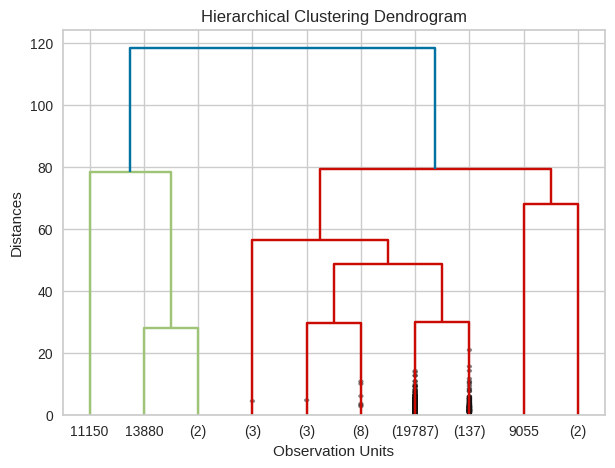

In [ ]:
plt.figure(figsize=(7, 5))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Observation Units")
plt.ylabel("Distances")
dendrogram(hc_complete,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
           leaf_font_size=10)
plt.show()

In [ ]:
# plt.figure(figsize=(7, 5))
# plt.title("Hierarchical Clustering Dendrogram")
# plt.xlabel("Observation Units")
# plt.ylabel("Distances")
# dendrogram(hc_single,
#            truncate_mode="lastp",
#            p=10,
#            show_contracted=True,
#            leaf_font_size=10)
# plt.show()

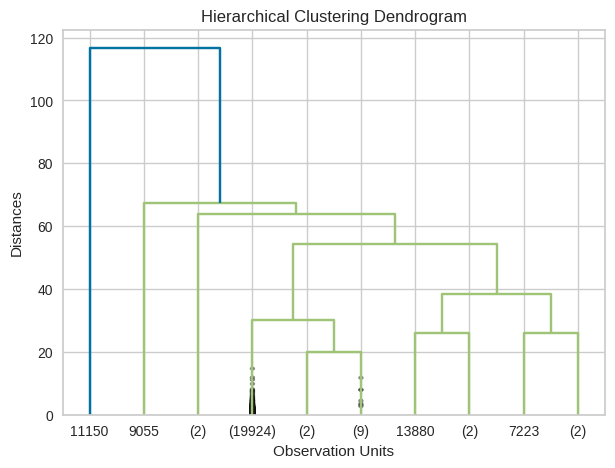

In [ ]:
plt.figure(figsize=(7, 5))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Observation Units")
plt.ylabel("Distances")
dendrogram(hc_centroid,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
           leaf_font_size=10)
plt.show()

We are using the *AgglomerativeClustering* class from scikit-learn to perform hierarchical clustering on a dataset X. We are setting the number of clusters to 3 and using the Euclidean distance and the Ward linkage method for clustering.

The *fit_predict method* fits the model to the data and returns the cluster labels for each sample in the dataset. The cluster labels are stored in the clusters_hc array.

After running this code, we can use the *clusters_hc* array to see the cluster labels for each sample in the dataset. For example, if the first sample has a cluster label of 0, it belongs to the first cluster. If the second sample has a cluster label of 1, it belongs to the second cluster, and so on.

In [ ]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clusters_hc = hc.fit_predict(X)
clusters_hc

X['cluster_hc'] = clusters_hc
X['cluster_hc'] = X['cluster_hc'] + 1
X.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,tenure,recency,frequency,monetary,order_num_total,customer_value_total,cluster,cluster_hc
0,0.210422,-0.443039,-0.377854,0.362797,-1.122127,-0.382058,-0.005222,0.210107,-0.005222,0.210107,1,2
1,3.760263,0.041732,-0.311591,1.628981,1.476349,-0.285232,3.368463,1.409799,3.368463,1.409799,3,1
2,-0.026234,0.041732,-0.212097,-0.122477,-0.476329,0.499055,-0.005222,-0.185312,-0.005222,-0.185312,8,3
3,-0.499547,-0.443039,-0.709501,-0.498860,-1.252050,0.005244,-0.637788,-0.702802,-0.637788,-0.702802,1,2
4,-0.499547,-0.443039,-0.676337,-0.405164,-0.254694,-0.469201,-0.637788,-0.604508,-0.637788,-0.604508,1,2


In [ ]:
X.groupby('cluster_hc').agg(['mean', 'median', 'count', 'std'])
X.groupby('cluster_hc').agg(['mean', 'median', 'count', 'std']).T

cluster_hc                                          1             2  \
order_num_total_ever_online       mean       0.984645     -0.225176   
                                  median     0.683734     -0.262891   
                                  count   4114.000000  10360.000000   
                                  std        1.787906      0.359751   
order_num_total_ever_offline      mean       0.667434     -0.161347   
                                  median     0.526504     -0.443039   
                                  count   4114.000000  10360.000000   
                                  std        1.919573      0.405717   
customer_value_total_ever_offline mean       0.740905     -0.172235   
                                  median     0.401135     -0.300779   
                                  count   4114.000000  10360.000000   
                                  std        1.830881      0.467587   
customer_value_total_ever_online  mean       0.866204     -0.208712   
                                  median     0.595796     -0.294688   
                                  count   4114.000000  10360.000000   
                                  std        1.894531      0.293320   
tenure                            mean       0.335680     -0.001920   
                                  median     0.005153     -0.334941   
                                  count   4114.000000  10360.000000   
                                  std        1.036819      1.143625   
recency                           mean      -0.329204     -0.488826   
                                  median    -0.546661     -0.604756   
                                  count   4114.000000  10360.000000   
                                  std        0.826292      0.668012   
frequency                         mean       1.167603     -0.270807   
                                  median     0.838199     -0.426933   
                                  count   4114.000000  10360.000000   
                                  std        1.642085      0.356133   
monetary                          mean       1.054957     -0.252075   
                                  median     0.708650     -0.307478   
                                  count   4114.000000  10360.000000   
                                  std        1.760692      0.303901   
order_num_total                   mean       1.167603     -0.270807   
                                  median     0.838199     -0.426933   
                                  count   4114.000000  10360.000000   
                                  std        1.642085      0.356133   
customer_value_total              mean       1.054957     -0.252075   
                                  median     0.708650     -0.307478   
                                  count   4114.000000  10360.000000   
                                  std        1.760692      0.303901   
cluster                           mean       4.724113      1.161390   
                                  median     4.000000      1.000000   
                                  count   4114.000000  10360.000000   
                                  std        1.111777      0.367908   

cluster_hc                                          3  
order_num_total_ever_online       mean      -0.314020  
                                  median    -0.499547  
                                  count   5471.000000  
                                  std        0.271525  
order_num_total_ever_offline      mean      -0.196356  
                                  median    -0.443039  
                                  count   5471.000000  
                                  std        0.375463  
customer_value_total_ever_offline mean      -0.230987  
                                  median    -0.344723  
                                  count   5471.000000  
                                  std        0.435043  
customer_value_total_ever_online  mean      -0.256134  
                    

In [ ]:
X["cluster_hc"].value_counts()                 # It shows the number of observations belonging to each cluster.
X["cluster_hc"].value_counts() / len(X) * 100

,count
cluster_hc,
2,51.942843
3,27.430434
1,20.626723


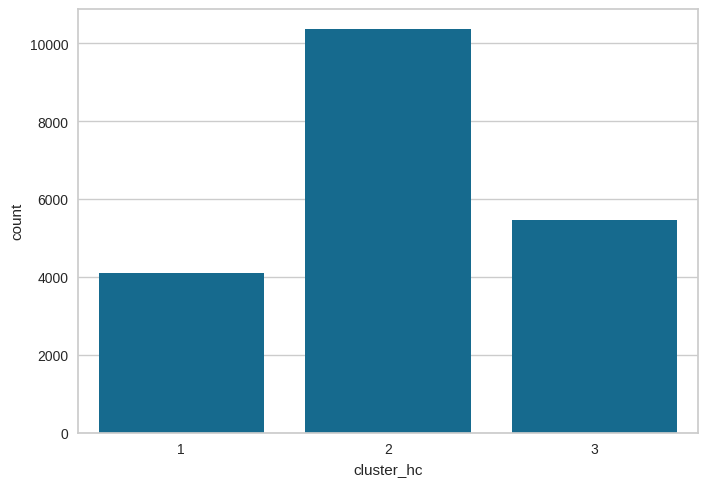

In [ ]:
sns.countplot(x='cluster_hc', data=X)
plt.show()

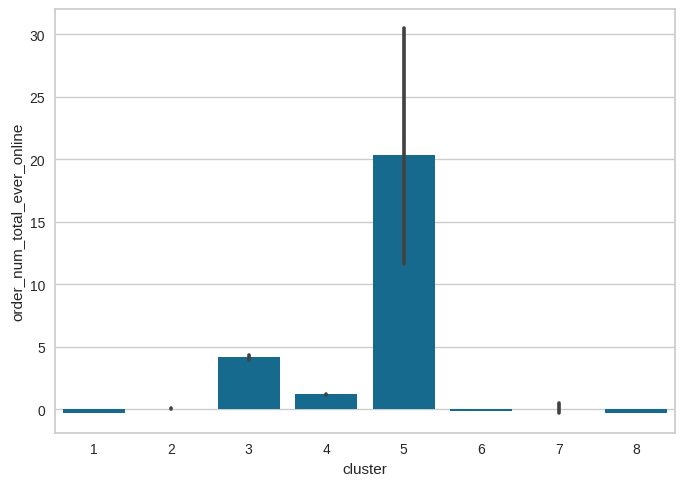

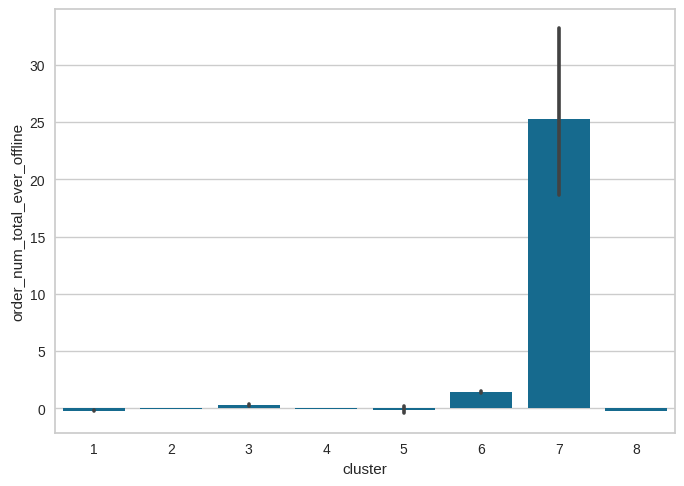

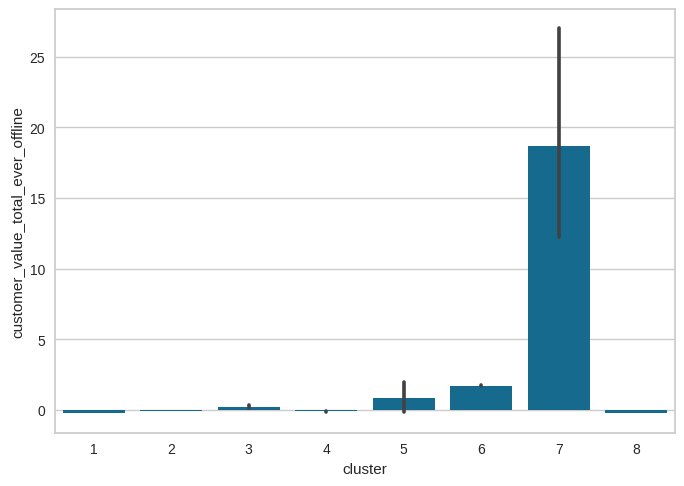

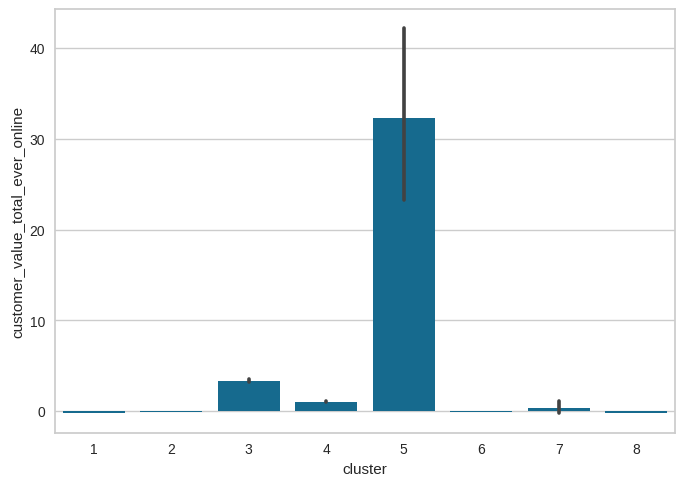

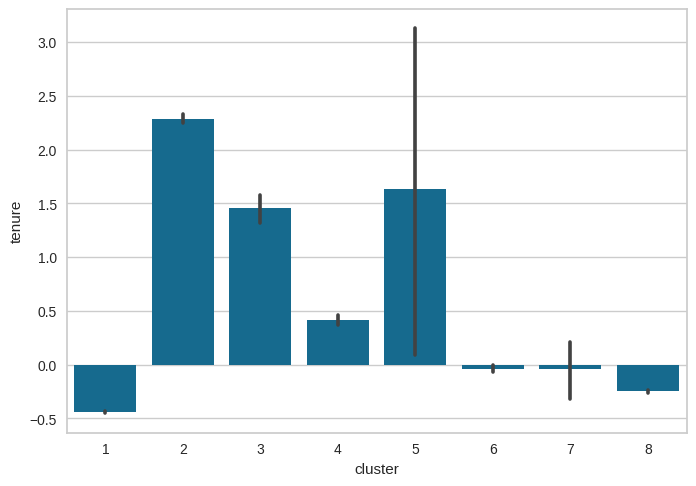

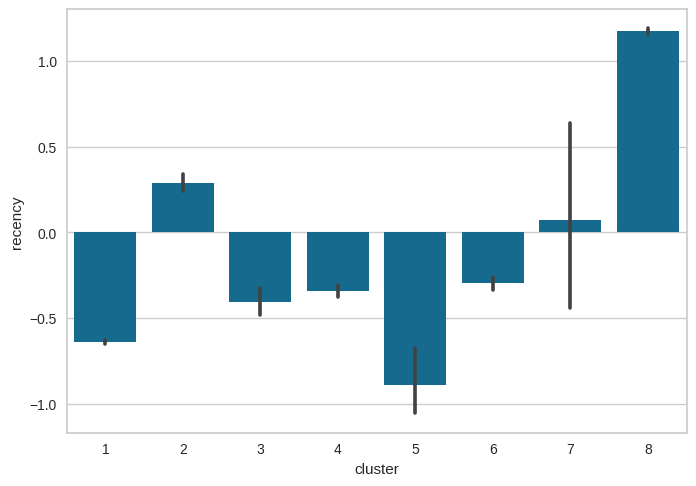

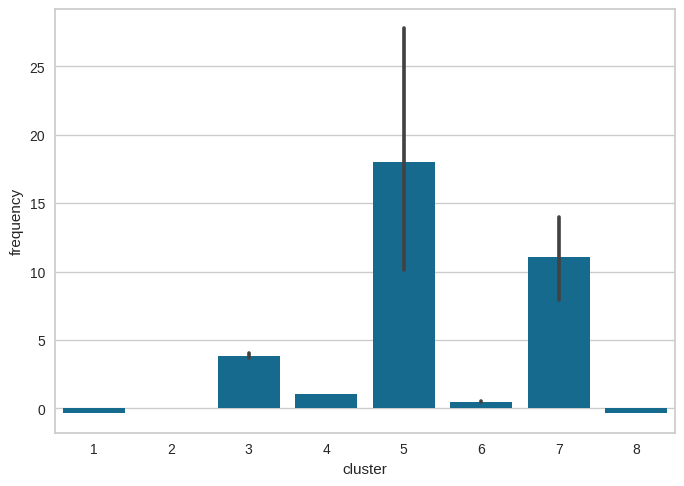

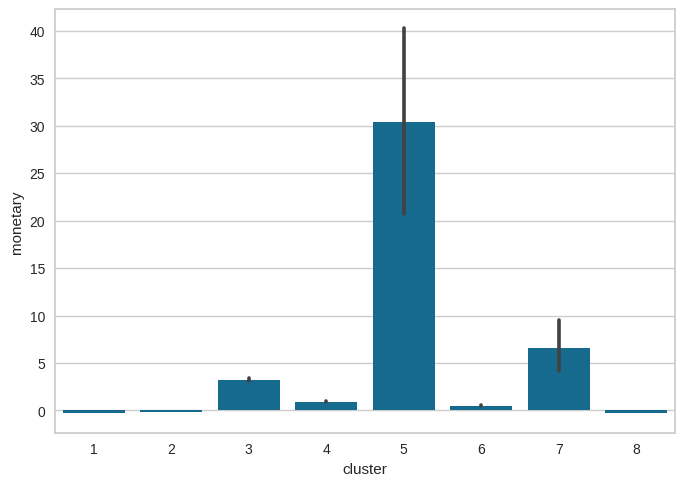

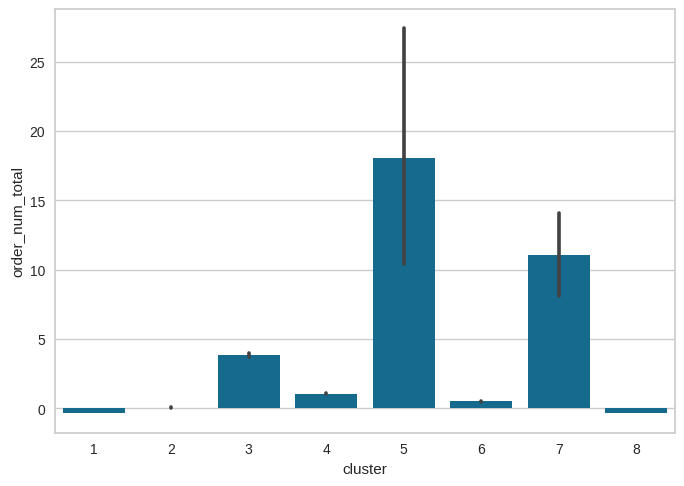

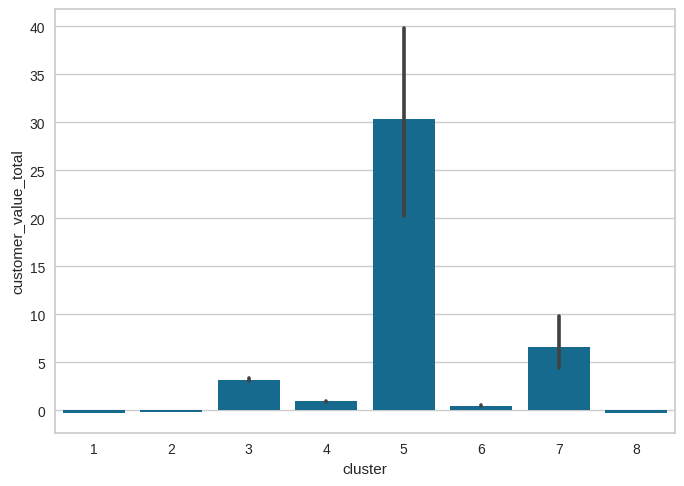

In [ ]:
for i in num_cols:
    sns.barplot(x='cluster', y=i, data=X)
    plt.show()

In [ ]:
# sns.pairplot(X, hue='cluster')
# plt.show()

# 6. Customer Segmentation with DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that is based on the density of data points. It can be used for customer segmentation by finding groups of similar customers based on their characteristics or attributes.




Use the DBSCAN class from scikit-learn to fit the model to your data. You'll need to specify two important parameters: eps and min_samples. eps is the maximum distance between two points in the same cluster, and min_samples is the minimum number of points required to form a cluster.

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=15)
clusters = dbscan.fit_predict(X)
print(clusters)
df['dbscan_cluster'] = clusters
df.head()

[ 0 -1  1 ...  0  2  1]


,master_id,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,...,order_num_total,customer_value_total,order_channel_Desktop,order_channel_Ios App,order_channel_Mobile,last_order_channel_Desktop,last_order_channel_Ios App,last_order_channel_Mobile,last_order_channel_Offline,dbscan_cluster
0,cc294636-19f0-11eb-8d74-000d3a38a36f,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],...,5.0,939.37,False,False,False,False,False,False,True,0
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",...,21.0,2013.55,False,False,False,False,False,True,False,-1
2,69b69676-1a40-11ea-941b-000d3a38a36f,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",...,5.0,585.32,False,False,False,False,False,False,False,1
3,1854e56c-491f-11eb-806e-000d3a38a36f,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",...,2.0,121.97,False,False,False,False,False,False,False,0
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],...,2.0,209.98,True,False,False,True,False,False,False,0


In [ ]:
X['cluster_dbscan'] = clusters
X['cluster_dbscan'] = X['cluster_dbscan'] + 1
X.head()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,tenure,recency,frequency,monetary,order_num_total,customer_value_total,cluster,cluster_hc,cluster_dbscan
0,0.210422,-0.443039,-0.377854,0.362797,-1.122127,-0.382058,-0.005222,0.210107,-0.005222,0.210107,1,2,1
1,3.760263,0.041732,-0.311591,1.628981,1.476349,-0.285232,3.368463,1.409799,3.368463,1.409799,3,1,0
2,-0.026234,0.041732,-0.212097,-0.122477,-0.476329,0.499055,-0.005222,-0.185312,-0.005222,-0.185312,8,3,2
3,-0.499547,-0.443039,-0.709501,-0.498860,-1.252050,0.005244,-0.637788,-0.702802,-0.637788,-0.702802,1,2,1
4,-0.499547,-0.443039,-0.676337,-0.405164,-0.254694,-0.469201,-0.637788,-0.604508,-0.637788,-0.604508,1,2,1


In [ ]:
X.groupby('cluster_dbscan').agg(['mean', 'median', 'count', 'std'])
X.groupby('cluster_dbscan').agg(['mean', 'median', 'count', 'std']).T

cluster_dbscan                                      0            1  \
order_num_total_ever_online       mean       1.518915    -0.281021   
                                  median     1.157046    -0.499547   
                                  count   2217.000000  8680.000000   
                                  std        2.209260     0.287648   
order_num_total_ever_offline      mean       0.755442    -0.184178   
                                  median     0.041732    -0.443039   
                                  count   2217.000000  8680.000000   
                                  std        2.481162     0.370660   
customer_value_total_ever_offline mean       0.905795    -0.194654   
                                  median     0.359132    -0.311525   
                                  count   2217.000000  8680.000000   
                                  std        2.320378     0.437083   
customer_value_total_ever_online  mean       1.277864    -0.225534   
                                  median     0.834067    -0.309077   
                                  count   2217.000000  8680.000000   
                                  std        2.440562     0.278219   
tenure                            mean       1.170700    -0.442710   
                                  median     1.048365    -0.426652   
                                  count   2217.000000  8680.000000   
                                  std        1.432480     0.473470   
recency                           mean      -0.038657    -0.639405   
                                  median    -0.285232    -0.701582   
                                  count   2217.000000  8680.000000   
                                  std        1.016002     0.450169   
frequency                         mean       1.681906    -0.330494   
                                  median     1.259910    -0.426933   
                                  count   2217.000000  8680.000000   
                                  std        2.071591     0.287312   
monetary                          mean       1.493272    -0.275267   
                                  median     1.107123    -0.330373   
                                  count   2217.000000  8680.000000   
                                  std        2.283512     0.289251   
order_num_total                   mean       1.681906    -0.330494   
                                  median     1.259910    -0.426933   
                                  count   2217.000000  8680.000000   
                                  std        2.071591     0.287312   
customer_value_total              mean       1.493272    -0.275267   
                                  median     1.107123    -0.330373   
                                  count   2217.000000  8680.000000   
                                  std        2.283512     0.289251   
cluster                           mean       4.007668     1.000000   
                                  median     4.000000     1.000000   
                                  count   2217.000000  8680.000000   
                                  std        1.463896     0.000000   
cluster_hc                        mean       1.203879     2.000000   
                                  median     1.000000     2.000000   
                                  count   2217.000000  8680.000000   
                                  std        0.435272     0.000000   

cluster_dbscan                                      2            3  \
order_num_total_ever_online       mean      -0.316172    -0.231434   
                                  median    -0.499547    -0.262891   
                                  count   5441.000000  1136.000000   
                                  std        0.269050     0.298270   
order_num_total_ever_offline      mean      -0.197579     1.223362   
                                  median    -0.443039     1.011275   
                                  count   5441.000000  1136.000000   
         

In [ ]:
X["cluster_dbscan"].value_counts()

,count
cluster_dbscan,
1,8680
2,5441
0,2217
5,1288
4,1174
3,1136
6,9


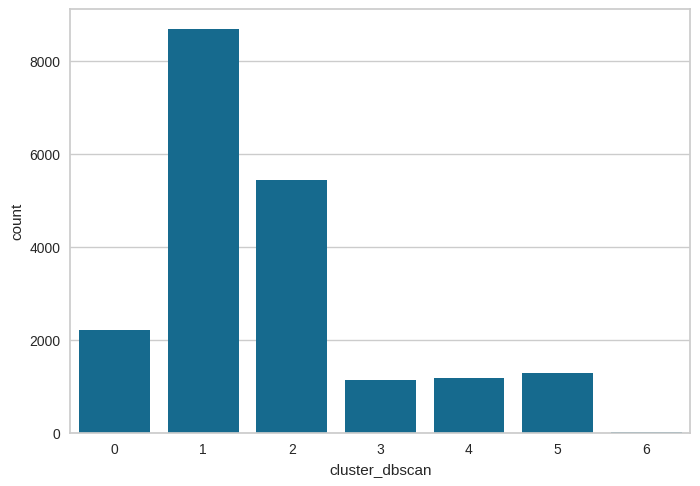

In [ ]:
sns.countplot(x='cluster_dbscan', data=X)
plt.show()

# Conclusion

Segmenting customers into different groups using their characteristics and behaviors has always been an important topic. Customer segmentation can lead to better customer understanding and targeting, which in turn leads to more effective product tailoring and marketing strategies. Data mining methods are powerful techniques that can be used in customer segmentation to find customers with similar characteristics.

# References

1. https://miuul.com/makine-ogrenmesi
2. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html